[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Cage6666/Big-Data-Application/blob/master/6-Neural%20Network/Neural%20Network.ipynb)

# 神经网络-多层感知机

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
import math
from math import log

import pprint

from imblearn.combine import SMOTETomek

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import tree
from sklearn import metrics
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

from imblearn.combine import SMOTETomek
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder

In [15]:
train = pd.read_csv('https://raw.githubusercontent.com/Cage6666/Big-Data-Application/master/2-Classification/PPDtrain.csv',engine = 'python')
test = pd.read_csv('https://raw.githubusercontent.com/Cage6666/Big-Data-Application/master/2-Classification/PPDtest.csv',engine = 'python')

In [16]:
data = train.append(test)

C:\ProgramData\anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [17]:
data.describe()

,Education_Info1,Education_Info5,Idx,SocialNetwork_1,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,...,WeblogInfo_54,WeblogInfo_55,WeblogInfo_56,WeblogInfo_57,WeblogInfo_58,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,WeblogInfo_9,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,28349.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.063000,0.032467,46318.673267,0.001233,75.211233,-0.999267,-0.745033,0.221167,0.062033,0.027967,...,0.006167,0.000800,0.019067,0.016133,0.002633,2.948711,10.632800,0.657633,0.120567,0.073267
std,0.242967,0.177239,26640.397805,0.036948,742.978305,0.052911,0.441473,0.420545,0.242598,0.164880,...,0.115740,0.036507,0.183587,0.169727,0.063455,3.770300,16.097588,2.622133,1.337519,0.260578
min,0.000000,0.000000,3.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22924.250000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,46849.500000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,69447.250000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,13.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,91703.000000,2.000000,71253.000000,6.000000,1.000000,2.000000,3.000000,1.000000,...,11.000000,3.000000,11.000000,11.000000,3.000000,165.000000,722.000000,81.000000,46.000000,1.000000


In [18]:
#去掉超过95%列值为NaN或0的变量
final_data = data.loc[:, (data==np.nan).mean() < .95]
final_data = final_data.loc[:, (data==0).mean() < .95]
#把余下少量的缺失值填为-99(一般会填为0或-1，但在许多列中存在0和-1，故这里选用-99)。
final_data = final_data.fillna(-99)

In [19]:
final_data.describe()

,Education_Info1,Idx,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_17,SocialNetwork_3,SocialNetwork_4,...,WeblogInfo_30,WeblogInfo_33,WeblogInfo_36,WeblogInfo_39,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,target
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.063000,46318.673267,75.211233,-0.999267,-0.745033,0.221167,0.062033,0.253467,8.552363e+01,5.014967,...,-0.696733,-0.534800,-0.643667,-0.730933,-2.588867,-3.731333,-2.661867,10.632800,0.657633,0.073267
std,0.242967,26640.397805,742.978305,0.052911,0.441473,0.420545,0.242598,0.437296,6.362796e+03,73.277866,...,9.077462,9.155202,9.102907,9.071642,23.554150,23.050615,23.536427,16.097588,2.622133,0.260578
min,0.000000,3.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000,...,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,0.000000,0.000000,0.000000
25%,0.000000,22924.250000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000
50%,0.000000,46849.500000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000e+00,-1.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,6.000000,0.000000,0.000000
75%,0.000000,69447.250000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,-1.000000e+00,-1.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,3.000000,13.000000,0.000000,0.000000
max,1.000000,91703.000000,71253.000000,6.000000,1.000000,2.000000,3.000000,3.000000,1.032721e+06,2996.000000,...,12.000000,21.000000,23.000000,12.000000,165.000000,73.000000,165.000000,722.000000,81.000000,1.000000


In [20]:
#将运营商信息变为哑变量
cat_feats = ['UserInfo_8']
final_data = pd.get_dummies(final_data,columns=cat_feats,drop_first=True)

#其余的文本型变量意义不明，暂时先删掉，建议大家可以尝试把他们做成哑变量加入模型训练
final_data = final_data.select_dtypes(exclude=['object'])

In [21]:
final_data.head()

,Education_Info1,Idx,SocialNetwork_10,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_17,SocialNetwork_3,SocialNetwork_4,...,WeblogInfo_4,WeblogInfo_5,WeblogInfo_6,WeblogInfo_7,WeblogInfo_8,target,UserInfo_8_,UserInfo_8_ChinaMobile,UserInfo_8_ChinaTelecom,UserInfo_8_ChinaUnicom
0,0,28564,-1,-1,-1,0,0,0,-1,-1,...,1.0,1.0,1.0,17,2,0,0,0,0,1
1,0,89563,-1,-1,-1,0,1,0,-1,-1,...,6.0,5.0,6.0,50,0,0,0,0,1,0
2,0,2748,319,-1,0,1,0,1,26,55,...,2.0,2.0,2.0,0,0,0,0,1,0,0
3,0,64456,-1,-1,-1,0,0,0,-1,-1,...,1.0,1.0,1.0,5,2,0,0,0,0,0
4,1,73732,-1,-1,-1,1,0,0,-1,-1,...,2.0,2.0,2.0,13,0,0,0,1,0,0


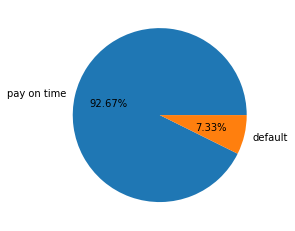

In [22]:
# 为确保绘制的饼图为圆形，需执行如下代码
plt.axes(aspect = 'equal')
# 统计交易是否为欺诈的频数
counts = final_data.target.value_counts()

# 绘制饼图
plt.pie(x = counts, # 绘图数据
        labels=pd.Series(counts.index).map({1:'default',0:'pay on time'}), # 添加文字标签
        autopct='%.2f%%' # 设置百分比的格式，这里保留一位小数
       )
# 显示图形
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X = final_data.drop('target',axis=1)
y = final_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

这里首先使用SMOTE方法，到这一步为止所有步骤都与第一章分类中的操作相同，大家可以根据自己之前的想法来调整特征工程

In [24]:
over_samples = SMOTE(random_state=666) 
over_samples_X,over_samples_y = over_samples.fit_sample(X_train, y_train)
# 重抽样前的类别比例
print(y_train.value_counts()/len(y_train))
# 重抽样后的类别比例
print(pd.Series(over_samples_y).value_counts()/len(over_samples_y))

0    0.927238
1    0.072762
Name: target, dtype: float64
1    0.5
0    0.5
dtype: float64


In [25]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=174, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [47]:
estimator1 = KerasClassifier(build_fn=baseline_model, nb_epoch=40, batch_size=256)
estimator1.fit(X_train, y_train)

Epoch 1/1
21000/21000 [==============================] - 0s 21us/step - loss: 243.0779 - accuracy: 0.8515


In [49]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(estimator1, X_test, y_test, cv=10)
conf_mat = confusion_matrix(y_test, y_pred)

Epoch 1/1
8100/8100 [==============================] - 0s 21us/step - loss: 273.1389 - accuracy: 0.8570
Epoch 1/1
8100/8100 [==============================] - 0s 20us/step - loss: 315.7835 - accuracy: 0.8564
Epoch 1/1
8100/8100 [==============================] - 0s 20us/step - loss: 292.3687 - accuracy: 0.8480
Epoch 1/1
8100/8100 [==============================] - 0s 23us/step - loss: 241.6186 - accuracy: 0.8642
Epoch 1/1
8100/8100 [==============================] - 0s 19us/step - loss: 688.7099 - accuracy: 0.7921
Epoch 1/1
8100/8100 [==============================] - 0s 19us/step - loss: 230.3607 - accuracy: 0.8504
Epoch 1/1
8100/8100 [==============================] - 0s 20us/step - loss: 276.6615 - accuracy: 0.8149
Epoch 1/1
8100/8100 [==============================] - 0s 21us/step - loss: 1064.4222 - accuracy: 0.7343
Epoch 1/1
8100/8100 [==============================] - 0s 19us/step - loss: 730.7248 - accuracy: 0.7854
Epoch 1/1
8100/8100 [==============================] - 0s 19us/

In [50]:
conf_mat

array([[7844,  486],
       [ 611,   59]], dtype=int64)

In [51]:
estimator2 = KerasClassifier(build_fn=baseline_model, nb_epoch=40, batch_size=256)
estimator2.fit(over_samples_X,over_samples_y)

Epoch 1/1
38944/38944 [==============================] - 0s 10us/step - loss: 414.0160 - accuracy: 0.5525


In [32]:
predictions2 = estimator2.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions2))
confusion_matrix2 = confusion_matrix(y_test,predictions2)
print(confusion_matrix2)

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      8330
           1       0.10      0.30      0.15       670

    accuracy                           0.74      9000
   macro avg       0.52      0.54      0.50      9000
weighted avg       0.87      0.74      0.80      9000

[[6501 1829]
 [ 469  201]]


In [52]:
y_pred = cross_val_predict(estimator2, X_test, y_test, cv=10)
conf_mat = confusion_matrix(y_test, y_pred)

Epoch 1/1
8100/8100 [==============================] - 0s 19us/step - loss: 310.7305 - accuracy: 0.8310
Epoch 1/1
8100/8100 [==============================] - 0s 21us/step - loss: 331.0739 - accuracy: 0.8165
Epoch 1/1
8100/8100 [==============================] - 0s 20us/step - loss: 340.2750 - accuracy: 0.8589
Epoch 1/1
8100/8100 [==============================] - 0s 20us/step - loss: 241.1645 - accuracy: 0.8359
Epoch 1/1
8100/8100 [==============================] - 0s 20us/step - loss: 549.5516 - accuracy: 0.7701
Epoch 1/1
8100/8100 [==============================] - 0s 21us/step - loss: 211.0534 - accuracy: 0.8504
Epoch 1/1
8100/8100 [==============================] - 0s 23us/step - loss: 260.4284 - accuracy: 0.8651
Epoch 1/1
8100/8100 [==============================] - 0s 21us/step - loss: 353.9604 - accuracy: 0.8231
Epoch 1/1
8100/8100 [==============================] - 0s 25us/step - loss: 730.0018 - accuracy: 0.7649
Epoch 1/1
8100/8100 [==============================] - 0s 26us/s

In [53]:
conf_mat

array([[7178, 1152],
       [ 560,  110]], dtype=int64)

这里发现有大量的不违约样本被预测成了违约，猜想可能是SMOTE方法生成的一部分正负样本在空间中过于接近，造成了过拟合，故采取SMOTE+Tomek link方法，来改善这一情况。
**SMOTE抽样 + Tomek Link**    
SMOTE的主要思想是利用特征空间中现存少数类样本之间的相似性来建立人工数据，特别是，对于子集Smin ⊂ S，对于每一个样本xi⊂Smin使用K-近邻法，其中K-近邻被定义为考虑Smin中的K个元素本身与xi的欧氏距离在n维特征空间X中表现为最小幅度值的样本。由于不是简单地复制少数类样本，因此可以在一定程度上避免分类器的过度拟合，实践证明此方法可以提高分类器的性能。     
但是由于对每个少数类样本都生成新样本，因此容易发生生成样本重叠（overlapping）的问题。因此在利用SMOTE方法生成新的少数类样本，得到扩充后的数据集T后，引入ENN(Edited Nearest Neighbors)，对T中的每一个样本使用KNN（一般K取3）方法预测，若预测结果与实际类别标签不符，则剔除该样本。
https://imbalanced-learn.readthedocs.io/en/stable/combine.html#bbm2003

In [34]:
print('Original dataset shape %s' % Counter(y_train))  #重抽样前的y值数量
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res)) #重抽样后的y值数量

Original dataset shape Counter({0: 19472, 1: 1528})
Resampled dataset shape Counter({0: 19443, 1: 19443})


In [54]:
estimator3 = KerasClassifier(build_fn=baseline_model, nb_epoch=40, batch_size=256)
estimator3.fit(X_res, y_res)

Epoch 1/1
38886/38886 [==============================] - 0s 11us/step - loss: 379.2231 - accuracy: 0.5222


In [55]:
y_pred = cross_val_predict(estimator3, X_test, y_test, cv=10)
conf_mat = confusion_matrix(y_test, y_pred)

Epoch 1/1
8100/8100 [==============================] - 0s 19us/step - loss: 196.4262 - accuracy: 0.8535
Epoch 1/1
8100/8100 [==============================] - 0s 19us/step - loss: 465.9692 - accuracy: 0.8456
Epoch 1/1
8100/8100 [==============================] - 0s 20us/step - loss: 306.5214 - accuracy: 0.8341
Epoch 1/1
8100/8100 [==============================] - 0s 20us/step - loss: 792.1055 - accuracy: 0.7752
Epoch 1/1
8100/8100 [==============================] - 0s 21us/step - loss: 270.6456 - accuracy: 0.8707
Epoch 1/1
8100/8100 [==============================] - 0s 21us/step - loss: 187.0553 - accuracy: 0.8641
Epoch 1/1
8100/8100 [==============================] - 0s 20us/step - loss: 884.9254 - accuracy: 0.7735
Epoch 1/1
8100/8100 [==============================] - 0s 20us/step - loss: 548.3796 - accuracy: 0.8206
Epoch 1/1
8100/8100 [==============================] - 0s 23us/step - loss: 258.2597 - accuracy: 0.8660
Epoch 1/1
8100/8100 [==============================] - 0s 22us/s

In [56]:
conf_mat

array([[7795,  535],
       [ 604,   66]], dtype=int64)

In [57]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #Naive bayes
ensemble=VotingClassifier(estimators=[('NN',KerasClassifier(build_fn=baseline_model, nb_epoch=40, batch_size=256)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(criterion = 'entropy')),
                                              ('NB',GaussianNB()),
                                             ], 
                       voting='soft').fit(X_res, y_res)

Epoch 1/1
38886/38886 [==============================] - 0s 10us/step - loss: 574.2219 - accuracy: 0.5416


C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [58]:
predictions5 = ensemble.predict(X_test)
print(classification_report(y_test,predictions5))
from sklearn.metrics import classification_report,confusion_matrix
confusion_matrix5 = confusion_matrix(y_test,predictions5)
print(confusion_matrix5)

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      8330
           1       0.11      0.32      0.16       670

    accuracy                           0.76      9000
   macro avg       0.52      0.56      0.51      9000
weighted avg       0.87      0.76      0.80      9000

[[6580 1750]
 [ 455  215]]


In [59]:
TP = confusion_matrix5[0,0]
FN = confusion_matrix5[0,1] 
FP = confusion_matrix5[1,0]; TN = confusion_matrix5[1,1]
print (u"TP, FN, FP, TN的值依次是:", TP, FN, FP, TN)
print (u"优化前的收入为:",1000*(0.1*TP+0.1*FN-FP-TN),"优化后的收入为:",1000*(0.1*TP-FP),";相比之前，营收变化了",-1000*(0.1*TP+0.1*FN-FP-TN)+1000*(0.1*TP-FP))

TP, FN, FP, TN的值依次是: 6580 1750 455 215
优化前的收入为: 163000.0 优化后的收入为: 203000.0 ;相比之前，营收变化了 40000.0
